In [3]:
#支持向量机本质上非线性方法，在样本比较少的时候，容易抓住数据和特征之间的非线性关系，但是svm对缺失数据敏感。
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#在支持向量回归问题上，使用的数据集是scikit-learn自带的一个糖尿病病人的数据集。
def load_data_regression():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size = 0.25, random_state = 0)

In [5]:
#在支持向量分类问题中，使用尾花数据集
def load_data_classfication():
    iris = datasets.load_iris()
    return cross_validation.train_test_split(iris.data, iris.target, test_size = 0.25, random_state = 0, stratify =iris.target)
#采用分层抽样

In [7]:
#linearSVC实现了线性分类支持向量机。它是根据liblinear实现的，可以用于二分类和多分类
def test_LinearSVC(*data):
    x_train, x_test, y_train, y_test = data 
    cls = svm.LinearSVC()
    cls.fit(x_train, y_train)
    print("coeffiicients:  %s, intercept: %s"%(cls.coef_, cls.intercept_))
    print("Score: %.2f"%cls.score(x_test, y_test))

In [8]:
#调用test_LinearSVC函数
x_train, x_test, y_train, y_test = load_data_classfication()
test_LinearSVC(x_train, x_test, y_train, y_test )

coeffiicients:  [[ 0.20959956  0.39924115 -0.81738776 -0.44231676]
 [-0.12795472 -0.78671947  0.51951937 -1.02158065]
 [-0.80314044 -0.87610972  1.21377552  1.81001377]], intercept: [ 0.11973915  2.0402536  -1.44407321]
Score: 0.97


In [13]:
#考察损失函数的影响
def test_LinearSVC_loss(*data):
    x_train, x_test, y_train, y_test = data
    losses = ["hinge","squared_hinge"]
    for loss in losses:
        cls = svm.LinearSVC(loss = loss)
        cls.fit(x_train,y_train)
        print("Loss: %s" %loss)
        print("coeffiicients:  %s, intercept: %s"%(cls.coef_, cls.intercept_))
        print("Score: %.2f"%cls.score(x_test, y_test))    

In [14]:
test_LinearSVC_loss(x_train, x_test, y_train, y_test )

Loss: hinge
coeffiicients:  [[ 0.36637159  0.32164342 -1.07533866 -0.57004745]
 [ 0.47354043 -1.56073802  0.39701651 -1.34439385]
 [-1.21547312 -1.15184389  1.84982658  1.98122214]], intercept: [ 0.18050249  1.33771718 -1.43210261]
Score: 0.97
Loss: squared_hinge
coeffiicients:  [[ 0.20959093  0.39924135 -0.81738846 -0.44231903]
 [-0.12762616 -0.7861266   0.51903873 -1.02159412]
 [-0.80307199 -0.87610642  1.21370857  1.81012882]], intercept: [ 0.11973718  2.03882416 -1.44412358]
Score: 0.97


In [17]:
#考察惩罚项形式的影响
def test_LinearSVC_L12(*data):
    x_train, x_test, y_train, y_test = data
    l12 = ["l1","l2"]
    for p in l12:
        cls = svm.LinearSVC(penalty=p, dual=False)
        cls.fit(x_train,y_train)
        print("penalty: %s" %p)
        print("coeffiicients:  %s, intercept: %s"%(cls.coef_, cls.intercept_))
        print("Score: %.2f"%cls.score(x_test, y_test))   

In [19]:
test_LinearSVC_L12(x_train, x_test, y_train, y_test)

penalty: l1
coeffiicients:  [[ 0.16581773  0.51921647 -0.93430136  0.        ]
 [-0.15239546 -0.90880439  0.48194667 -0.93293144]
 [-0.55363404 -0.85338276  0.94656741  2.34114832]], intercept: [ 0.          2.58388684 -2.63376264]
Score: 0.95
penalty: l2
coeffiicients:  [[ 0.20966721  0.39922563 -0.81739423 -0.44237657]
 [-0.13079574 -0.7872181   0.52298032 -1.02445961]
 [-0.80308922 -0.87656106  1.21391169  1.81021937]], intercept: [ 0.11945388  2.04805235 -1.44409296]
Score: 0.97


In [20]:
#考察惩罚项系数c的影响，c衡量了误分类点的重要性，c越大则误分类点越重要。
def test_LinearSVC_C(*data):
    x_train, x_test, y_train, y_test = data
    cs = np.logspace(-2, 1)
    train_score = []
    test_score = []
    for c in cs:
        cls = svm.LinearSVC(C=c)
        cls.fit(x_train,y_train)
        train_score.append(cls.score(x_train, y_train))
        test_score.append(cls.score(x_test, y_test))
#绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(cs, train_score, label = "train score")
    ax.plot(cs, test_score, label = "tset score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale("log")
    ax.set_title("LinearSVC")
    ax.legend(loc = "best")
    plt.show()

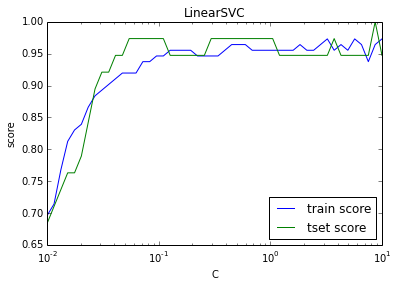

In [24]:
test_LinearSVC_C(x_train, x_test, y_train, y_test)

In [25]:
#SVC实现了非线性分类支持向量机，它是根据libsvm实现的，可以用于二分类和多分类
def test_SVC_linear(*data):
    x_train, x_test, y_train, y_test = data 
    cls = svm.SVC(kernel="linear")
    cls.fit(x_train, y_train)
    print("coeffiicients:  %s, intercept: %s"%(cls.coef_, cls.intercept_))
    print("Score: %.2f"%cls.score(x_test, y_test))

In [26]:
test_SVC_linear(x_train, x_test, y_train, y_test)

coeffiicients:  [[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept: [ 2.0368826  1.1512924  6.3276538]
Score: 1.00


In [31]:
#考察多项式核
def test_SVC_poly(*data):
    x_train, x_test, y_train, y_test = data
    fig = plt.figure()
    #测试degree
    degrees = range(1,20)
    train_score = []
    test_score =[]
    for degree in degrees:
        cls = svm.SVC(kernel="poly", degree = degree)
        cls.fit(x_train,y_train)
        train_score.append(cls.score(x_train, y_train))
        test_score.append(cls.score(x_test, y_test))
    ax = fig.add_subplot(1, 3, 1)
    ax.plot(degrees, train_score, label = "train score", marker = "+")
    ax.plot(degrees, test_score, label = "test score", marker = "o")
    ax.set_title("SVC_poly_degree")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc = "best")
    #测试gamma
    gammas = range(1,20)
    train_score = []
    test_score =[]
    for gamma in gammas:
        cls = svm.SVC(kernel = "poly", gamma = gamma, degree = 3)
        cls.fit(x_train, y_train)
        train_score.append(cls.score(x_train,y_train))
        test_score.append(cls.score(x_test, y_test))
    ax = fig.add_subplot(1, 3, 2)
    ax.plot(gammas, train_score, label = "train score", marker = "+")
    ax.plot(gammas, test_score, label = "test score", marker = "o")
    ax.set_title("SVC_poly_gamma")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc = "best")
    #测试r
    rs = range(0,20)
    train_score = []
    test_score =[]
    for r in rs:
        cls = svm.SVC(kernel = "poly", gamma = 10, degree = 3, coef0=r)
        cls.fit(x_train, y_train)
        train_score.append(cls.score(x_train,y_train))
        test_score.append(cls.score(x_test, y_test))
    ax = fig.add_subplot(1, 3, 3)
    ax.plot(rs, train_score, label = "train score", marker = "+")
    ax.plot(rs, test_score, label = "test score", marker = "o")
    ax.set_title("SVC_poly_r")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc = "best")
    plt.show()

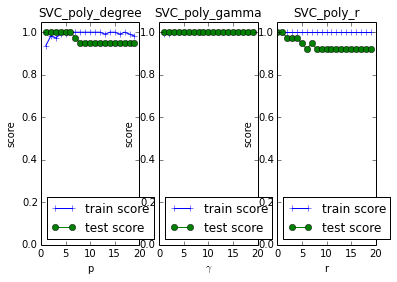

In [32]:
test_SVC_poly(x_train, x_test, y_train, y_test)
#可以看到在预测集上的预测性能随gamma的变化较为平稳

In [1]:
#考察高斯核
def test_SVC_rbf(*data):
    x_train, x_test, y_train, y_test = data
    gammas = range(1,20)
    train_score = []
    test_score = []
    for gamma in gammas:
        cls = svm.SVC(kernel = 'rbf', gamma = gamma)
        cls.fit(x_train,y_train)
        train_score.append(cls.score(x_train, y_train))
        test_score.append(cls.score(x_test, y_test))
#绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(gammas, train_score, label = "train score")
    ax.plot(gammas, test_score, label = "tset score")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel(r"score")
    ax.set_ylim(0,1.05)
    ax.set_title("SVC_rbf")
    ax.legend(loc = "best")
    plt.show()

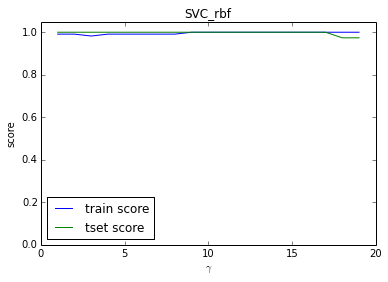

In [10]:
test_SVC_rbf(x_train, x_test, y_train, y_test)